# Fall 2021 Data Science Intern Challenge
by Creagh Briercliffe

## Question 1
> On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

In [16]:
# Load libraries
library(dplyr)      # manipulating data
library(lubridate)  # working with dates
library(scales)     # working with currency
library(ggplot2)    # plotting

Read in the shoe sales data; examine the structure of the dataframe.

In [2]:
sales <- read.csv('data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', header=TRUE)
str(sales)

'data.frame':	5000 obs. of  7 variables:
 $ order_id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ shop_id       : int  53 92 44 18 18 58 87 22 64 52 ...
 $ user_id       : int  746 925 861 935 883 882 915 761 914 788 ...
 $ order_amount  : int  224 90 144 156 156 138 149 292 266 146 ...
 $ total_items   : int  2 1 1 1 1 1 1 2 2 1 ...
 $ payment_method: Factor w/ 3 levels "cash","credit_card",..: 1 1 1 2 2 2 1 1 3 2 ...
 $ created_at    : Factor w/ 4991 levels "2017-03-01 0:08:09",..: 2064 423 2310 4169 142 2233 106 1294 2751 4920 ...


Let's take a peek at the first several entries.

In [3]:
head(sales)

order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11
6,58,882,138,1,credit_card,2017-03-14 15:25:01


Since we are interested in calculating metrics over a 30 day window, we convert the `created_at` column to date format. We can then calculate the length of time that our data spans.

In [4]:
sales$created_at <- ymd_hms(sales$created_at)  # convert factor to date format
max(sales$created_at) - min(sales$created_at)  # calculate the time window length

Time difference of 29.99127 days

As the dataframe consiststs of 30 days, we confirm the AOV simply by calculating the mean over the entire `order_amount` column. Producing a 5 number summary reveals that the data is highly right-skewed: the mean is around 8 times larger than the third quartile.

In [5]:
dollar_format()(mean(sales$order_amount))  # calculate AOV
summary(sales$order_amount)                # produce 5 number summary

[1] "$3,145.13"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     90     163     284    3145     390  704000 

If we were to create a visualization of this raw data, the heavy right-skew and scale of the plot will make it difficult to discern any information about the bulk of the data. Instead, since all order amounts are greater than zero, we can visualize the histogram of order amounts on a logarithmic scale&mdash;this transformation is purely for visualization purposes. In the following plot, the blue dashed line represents the AOV, while the red dashed line marks the median order amount.

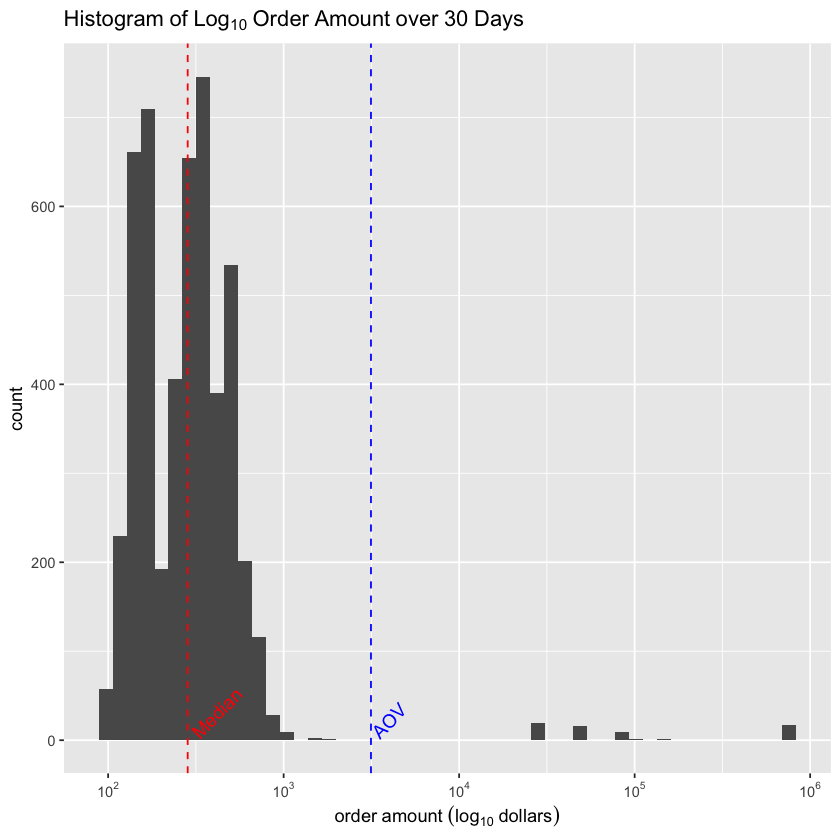

In [58]:
aov <- mean(sales$order_amount)   # AOV
med <- median(sales$order_amount) # Median order amount

ggplot(sales, aes(x=order_amount)) + 
    geom_histogram(bins=50) + 
    geom_vline(aes(xintercept=mean(order_amount)), color="blue", linetype="dashed", size=0.5) +
    geom_vline(aes(xintercept=median(order_amount)), color="red", linetype="dashed", size=0.5) +
    scale_x_log10(breaks=trans_breaks("log10", function(x) 10^x), labels=trans_format("log10", math_format(10^.x))) +
    ggtitle(expression(Histogram~of~Log[10]~Order~Amount~over~30~Days)) + 
    xlab(expression(order~amount~(log[10]~dollars))) +
    annotate(geom ="text", x = aov+400, y = 1, label="AOV", hjust=0, vjust=0, size = 4, angle = 45, color = "blue") +
    annotate(geom ="text", x = med+50, y = 1, label="Median", hjust=0, vjust=0, size = 4, angle = 45, color = "red")                                    

From the above plot, it is clear that a relatively small number of orders with high dollar amount are pulling the mean (or AOV) to the right, away from the center of the bulk of data. The red dashed line, representing the median order amount, appears to be a much better measure of the center of the data distribution, that is robust to the large outliers.

As we continue to explore the data and these outliers, it makes sense to consider the dollar amount per item in each order. Perhaps these large order amounts are simply caused by bulk orders of many sneakers, where the amount per sneaker purchased is still reasonable.

In [70]:
sales$amount_per_item <- sales$order_amount / sales$total_items  # dollar amount per item in each order
summary(sales$amount_per_item)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   90.0   133.0   153.0   387.7   169.0 25725.0 

We find that the maximum dollar amount per item across all orders is $25,725, which seems suspiciously high for a pair of sneakers!

Let's take a look at the data for the top 20 order amounts to see if we can find any more oddities.

In [60]:
head(sales %>% arrange(desc(order_amount)), 20)

order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352
521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352
1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352
1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352
1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352
1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352
1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352
2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352
2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352


The above data reveals some more curious beahaviour. We note two findings here:
1. There are several orders between the same `shop_id, user_id` pairing, (42, 607), for the same `order_amount` and `total_items`, occuring at the same time (4 AM), across multiple days; 
2. There are at least a few orders from `shop_id = 78` that have an amount per item of $25,725.

Exploring the data further, taking a look at the top 6 orders in terms of amount per item, we see that there are indeed several orders with an amount per item of $25,725, all from `shop_id = 78`.

In [61]:
head(sales %>% arrange(desc(amount_per_item)))

order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
161,78,990,25725,1,credit_card,2017-03-12 05:56:57,25725
491,78,936,51450,2,debit,2017-03-26 17:08:19,25725
494,78,983,51450,2,cash,2017-03-16 21:39:35,25725
512,78,967,51450,2,cash,2017-03-09 07:23:14,25725
618,78,760,51450,2,cash,2017-03-18 11:18:42,25725
692,78,878,154350,6,debit,2017-03-27 22:51:43,25725


Next, we examine the count of `total_items` across all orders to look at the frequency of unusually large purchase orders.

In [62]:
sales %>% 
    group_by(total_items) %>% 
    summarise(frequency = n()) %>% 
    arrange(desc(total_items))

total_items,frequency
2000,17
8,1
6,9
5,77
4,293
3,941
2,1832
1,1830


All but 17 orders are for 8 sneakers are less. The 17 large orders are each for 2000 sneakers, which seems particularly large unless there is some sort of supplier and retailer relationship. Even then, this still seems like odd behaviour, as each shop is supposedly only selling one model of sneaker.

To explore the high-end of dollar amounts per item across orders, we examine the top 10 and their respective frequencies below.

In [63]:
sales %>% 
    group_by(amount_per_item) %>% 
    summarise(frequency = n()) %>% 
    arrange(desc(amount_per_item)) %>% 
    top_n(10, amount_per_item)

amount_per_item,frequency
25725,46
352,51
201,53
196,61
195,54
193,44
190,35
187,105
184,49
181,112


There are 46 orders with a suspiciously high amount per item of $25,725. 

There are also 51 orders with a somewhat unusually large amount per item of $352. This amount per item is 75% greater than the next highest amount per item. Additionally, all amounts below it are relatively close together. Moreover, some of these 51 orders were from the orders with 2000 `total_items`, which was already suspcisious.

Let's take a look at all `shop_id`'s and `total_items` that have an order_amount greater than $201.

In [64]:
sales %>% 
    filter(amount_per_item > 201) %>% 
    group_by(shop_id, amount_per_item, total_items) %>% 
    summarise(frequency = n())

shop_id,amount_per_item,total_items,frequency
42,352,1,15
42,352,2,13
42,352,3,3
42,352,4,2
42,352,5,1
42,352,2000,17
78,25725,1,19
78,25725,2,16
78,25725,3,9
78,25725,4,1


There are two shops, 42 and 78, that are responsible for orders with unusually large amounts per item. Filtering the data to include only orders from these two shops, we see that shop 42 accounts for 51 orders and shop 78 accounts for 46 orders. All of their orders are for exactly the same amount per item.

In [71]:
sales %>% 
    filter(shop_id %in% c(42, 78)) %>% 
    group_by(shop_id, amount_per_item) %>% 
    summarise(frequency = n())

shop_id,amount_per_item,frequency
42,352,51
78,25725,46


This brings us to two possible ways to report a better metric for this dataset.

1. Consider that 51 + 46 = 97 orders only accounts for less than 2% of all orders over the last 30 days. In this case, it is reasonable to report the median order amount, which should be relatively unaffected by a small proportion of outliers and unusual records.

In [72]:
dollar_format()(median(sales$order_amount))

[1] "$284"

2. Alternatively, consider dropping orders from `shop_id` 42 and 78, when reporting the AOV.

In [68]:
sales %>% 
    filter(!shop_id %in% c(42, 78)) %>% 
    summarise(AOV = mean(order_amount), median_order_vale = median(order_amount), max = max(order_amount))

AOV,median_order_vale,max
300.1558,284,1086


Dropping these 97 unusual orders, we find that the AOV is approximately $300.16.

Additionally, we see that the median order amount remains unchanged at $284; further reinforcing that the median is a more robust metric.

## Answers - Question 1
> a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

Summarizing the exploratory analysis above, there are a relatively small number of large orders causing a heavy right-skew in order amount data. Specifically, there are 17 orders of 2,000 sneakers each occurring between the same shop and user ID pairs (42, 607), at the same time across multiple days. Shop 42 is responsible for 51 orders altogether, with an unusually high amount per item of $352. 

Additionally, shop 78 is responsible for 46 orders with a very suspicious amount per item of $25,725.

A better way to evaluate this data would be to examine first shops 42 and 78 to determine the reason for the suspicious order behaviour.

> b. What metric would you report for this dataset?

I recommend reporting the median order amount of $284. This metric is robust to the large outliers and is a commonly used measure of central tendency when data is right-skewed, like with housing prices and salaries.

Alternatively, if an examination of the orders from shops 42 and 78 reveals that this data is erroneous and merits exculsion, then dropping the 97 orders from these shops and reporting the new AOV of $300.16 seems reasonable.

> c. What is its value?

The median order amount is $284.

## Question 2

>a. How many orders were shipped by Speedy Express in total?

54


```{r eval=FALSE}
SELECT COUNT(*)
FROM Orders O, Shippers S
ON O.ShipperID = S.ShipperID
WHERE ShipperName = "Speedy Express";
```

> b. What is the last name of the employee with the most orders?

Peacock

```{r eval=False}
SELECT E.LastName, COUNT(*) Freq
FROM Orders O, Employees E
ON O.EmployeeID = E.EmployeeID
GROUP BY E.LastName
ORDER BY Freq DESC
LIMIT 1;
```

>c. What product was ordered the most by customers in Germany?

Boston Crab Meat

```{r eval=False}
SELECT ProductName, SUM(Quantity) Total
FROM Orders O, Customers C ON O.CustomerID = C.CustomerID
JOIN OrderDetails OD ON O.OrderID = OD.OrderID
JOIN Products P ON P.ProductID = OD.ProductID
WHERE Country = "Germany"
GROUP BY OD.ProductID
ORDER BY Total DESC
LIMIT 1;
```